In [3]:
import sys
sys.path.append("../codes/")
from Readfiles import getFnames
from DCdata import readReservoirDC_all
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
directory = "../data/ChungCheonDC/"

dam safety

In [5]:
fnames = getFnames(directory, dtype="apr", minimumsize=7000.)

In [6]:
fname_temp = fnames[0]
dat_temp,height_temp = readReservoirDC_all(fname_temp)

In [7]:
ntimes = len(fnames)
DATA = np.zeros((dat_temp.shape[0], ntimes))*np.nan
height = np.ones(ntimes)*np.nan

In [8]:
DATA.shape

(380L, 1298L)

In [9]:

for i, fname in enumerate(fnames):
    dat_temp,height_temp = readReservoirDC_all(fname)
    if dat_temp.shape[0] == 380:        
        DATA[:,i] = dat_temp[:,-1]
        height[i] = height_temp[0]            

In [10]:
a = ['1', '2', '3']

In [11]:
def strtofloat(input):
    temp = ""
    for i in input:
        temp += i 
    return float(temp)


In [20]:
# dat_temp,height_temp, datalist = readReservoirDC_all(fnames[79])
# print fnames[79]
# # datalist = readReservoirDC_all(fnames[79])

In [24]:
print fnames[79]

20150120120000.apr


In [25]:
locs = dat_temp[:,:4]

In [26]:
mida = locs[:,:2].sum(axis=1)
midb = locs[:,2:].sum(axis=1)
mid = (mida + midb)*0.5
dz = mida-midb

In [32]:
height

array([ 20.57 ,  20.57 ,  20.57 , ...,  20.428,  20.423,  20.417])

In [28]:
from ipywidgets import interact, IntSlider

In [163]:
from scipy import interpolate

In [330]:
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 100)
grid_x, grid_z = np.meshgrid(x,z)

def vizDCtimeSeries(idatum, itime):
#     idatum = 0
    figsize(8,6)
    fig = plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)    
#     ax1.plot(mid, dz, '.')

    grid_rho = griddata(mid, dz, DATA[:,itime], grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
    vmin, vmax = 50, 200.
    ax1.contourf(grid_x, grid_z, grid_rho, 100, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    ax1.scatter(mid, dz, s=20, c = DATA[:,itime], edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax1.plot(mid[idatum], dz[idatum], 'ro')    
    ax2.plot(DATA[idatum,:], 'k-', lw=2)
    ax2.set_yscale('log')
    ax2.set_ylim(vmin, vmax)
    ax2_1 = ax2.twinx()
    ax2_1.plot(height)
    ax2_1.set_ylim(15, 21.)

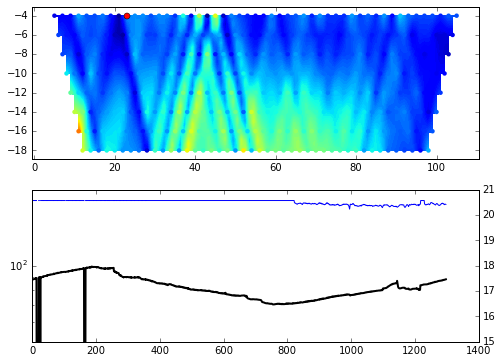

In [332]:
interact(vizDCtimeSeries, idatum=IntSlider(min=0, max=300, step=1, value=0), 
        itime=IntSlider(min=0, max=DATA.shape[1]-1, step=100, value=0))

In [223]:
dzu = np.unique(dz)

In [317]:
def profile_time(i_n, color):
    figsize(6,3)
    ind = np.argwhere(dz == dzu[::-1][i_n])
    nskip = 5
    for i in range(0,ind.size,nskip):
        plt.semilogy(DATA[ind.flatten()[i],:], color)
        plt.tight_layout()
    plt.ylim(50, 200)    


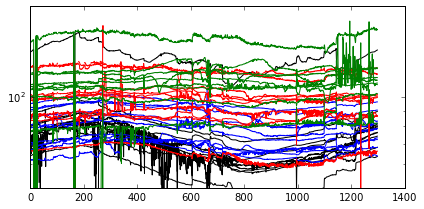

In [346]:
colors = ['k', 'b', 'r', 'g']
inds = [0, 2, 4, 6]
for i, ind in enumerate(inds):
    profile_time(ind,colors[i])

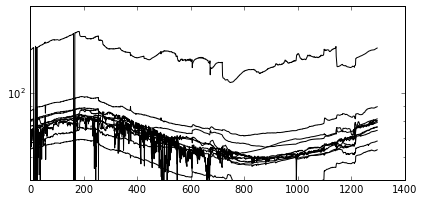

In [347]:
profile_time(0, 'k')

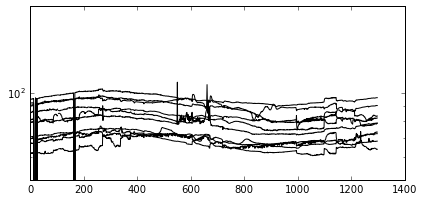

In [335]:
profile_time(2, 'k')

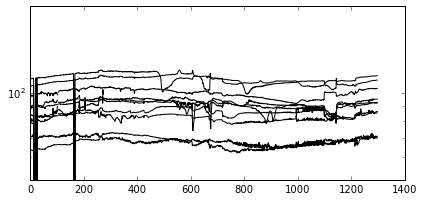

In [336]:
profile_time(3, 'k')

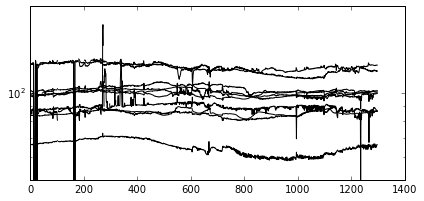

In [337]:
profile_time(4, 'k')

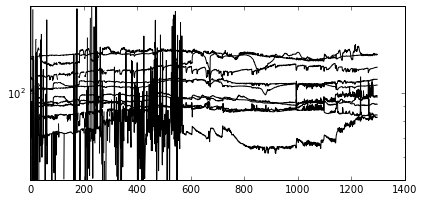

In [338]:
profile_time(5, 'k')

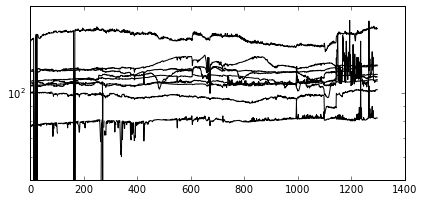

In [339]:
profile_time(6, 'k')

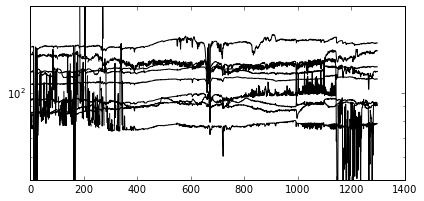

In [340]:
profile_time(7, 'k')